In [2]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

C:\Users\Mahsa\anaconda3\envs\oxe\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import contextily

Red: https://deepnote.com/@siew-sook-yan/Python-Retrieving-OpenStreetMap-data-with-OSMNX-NIFhR_zARQm2jYqcctP5hg

In [8]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Franklin County, Massachusetts, USA']
           #{'city':'Los Altos Hills', 'state':'California'},
           #'Loyola, California']
graph = ox.graph_from_place(pioneer_valley, network_type='drive')
area = ox.geocode_to_gdf(pioneer_valley)

In [9]:
print(type(graph))
print(type(area))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [10]:
# bldgs = ox.geometries_from_place(pioneer_valley, tags={'building':True}) # Retrieve buildings from the area:

In [11]:
bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_66896\4199359417.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})


In [12]:
#ox.plot_graph(graph, edge_linewidth=.5, node_size=1, figsize=(12, 18),)

In [13]:
ox.basic_stats(graph)

{'n': 26764,
 'm': 69406,
 'k_avg': 5.186519204902107,
 'edge_length_total': 18430777.137999747,
 'edge_length_avg': 265.5501993775718,
 'streets_per_node_avg': 2.7415931848752053,
 'streets_per_node_counts': {0: 0,
  1: 4850,
  2: 156,
  3: 18909,
  4: 2760,
  5: 87,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.18121357046779255,
  2: 0.005828725153190853,
  3: 0.7065087430877298,
  4: 0.10312359886414586,
  5: 0.0032506351815872066,
  6: 7.472724555372888e-05},
 'intersection_count': 21914,
 'street_length_total': 9620790.095999977,
 'street_segment_count': 36679,
 'street_length_avg': 262.29695727800583,
 'circuity_avg': 1.0835829360625242,
 'self_loop_proportion': 0.02944464134791025}

## Plots of Streets, Buildings, Bridges, Bus Stops

In [25]:
#Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

In [15]:
#STREETS
# fig, ax = plt.subplots(figsize=(15,15))
# area.plot(ax=ax, facecolor='.9',alpha=.3)
# streets.plot(ax=ax, linewidth=.2, edgecolor='k')
# plt.tight_layout()
# ax.axis('off')
# plt.savefig('../figures/pv-streets.png',dpi=120)

Reference for CenPy: https://contextily.readthedocs.io/en/latest/friends_cenpy_osmnx.html

In [16]:
help(cenpy.products.ACS().from_place)

Help on method from_place in module cenpy.products:

from_place(place, variables=None, level='tract', return_geometry=True, place_type=None, strict_within=True, return_bounds=False, replace_missing=True) method of cenpy.products.ACS instance
    Query the Census for the given place. 
    
    Parameters
    ---------
    place               : str
                          description of the place. Should be of the form
                          "place, state" or "place"
    place_type          : str
                          type of place to focus on, Incorporated Place, County Subdivision, or Census Designated Place. 
    variables           : list or str
                          variable or set of variables to extract from the
                          API. Can include regex columns, which will match
                          to any column in the product. So, ['P001001', '^P002']
                          will match to P001001 and any column that starts with P002.
    level         

In [17]:
acs = cenpy.products.ACS()

In [18]:
#acs.tables.to_csv('acs_tables.csv') #.loc[acs.tables.index=='B19025']

In [19]:
acs.tables.loc[acs.tables.index=='B01001']

,description,columns
table_name,,
B01001,SEX BY AGE,"[B01001_001E, B01001_002E, B01001_003E, B01001..."


In [20]:
print(acs.tables.description.unique())

['SEX BY AGE' 'MEDIAN AGE BY SEX' 'TOTAL POPULATION' 'RACE'
 'WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE FOR SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE BY SELECTED GROUPS'
 'AMERICAN INDIAN AND ALASKA NATIVE (AIAN) ALONE OR IN ANY COMBINATION BY SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'HISPANIC OR LATINO ORIGIN BY SPECIFIC ORIGI

In [21]:
print(acs.tables.description.unique())

['SEX BY AGE' 'MEDIAN AGE BY SEX' 'TOTAL POPULATION' 'RACE'
 'WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE FOR SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE BY SELECTED GROUPS'
 'AMERICAN INDIAN AND ALASKA NATIVE (AIAN) ALONE OR IN ANY COMBINATION BY SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'HISPANIC OR LATINO ORIGIN BY SPECIFIC ORIGI

In [28]:
spfld_msa_demog = cenpy.products.ACS(2017).from_msa('Aberdeen, SD', variables=['B01001_001E','B19025A_001E','B01002_001E','B15003_001E'])
# B01001: population (total, and by age (gender))
# B19025: income levels
# B01002_001E median age of total pop
# B15003_001E: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER

C:\Users\Mahsa\anaconda3\envs\oxe\lib\site-packages\cenpy\products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [29]:
franklin_demog = cenpy.products.ACS(2017).from_county('Franklin County, MA', variables=['B01001_001E','B19025A_001E','B01002_001E','B15003_001E'])
# B01001: population (total, and by age (gender))
# B19025: income levels
# B01002_001E median age of total pop
# B15003_001E: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER

C:\Users\Mahsa\anaconda3\envs\oxe\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [30]:
franklin_demog['population_density_psqkm'] = 1000000*franklin_demog['B01001_001E']/franklin_demog.area
spfld_msa_demog['population_density_psqkm'] = 1000000*spfld_msa_demog['B01001_001E']/spfld_msa_demog.area

franklin_demog = franklin_demog.to_crs(streets.crs)
spfld_msa_demog = spfld_msa_demog.to_crs(streets.crs)

In [32]:
#spfld_msa_demog.sum()

### Population

In [ ]:
matplotlib.rcParams['legend.fontsize'] = 20

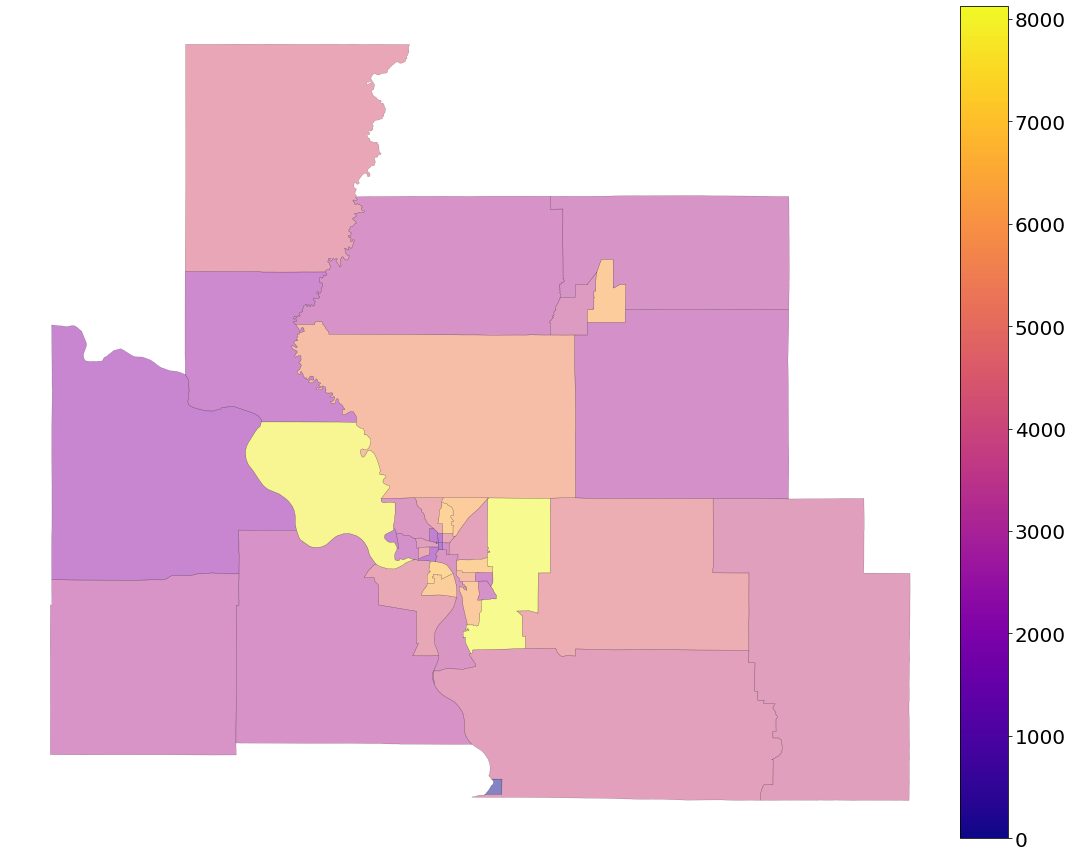

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#aus_data.eval('pct_afam = B02001_003E / B02001_001E')\.plot('pct_afam', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
spfld_msa_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k', legend = True, cax=cax)
ax.axis('off')
cax.tick_params(labelsize='20')
#plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
#plt.savefig('../figures/pv-pop.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Population density

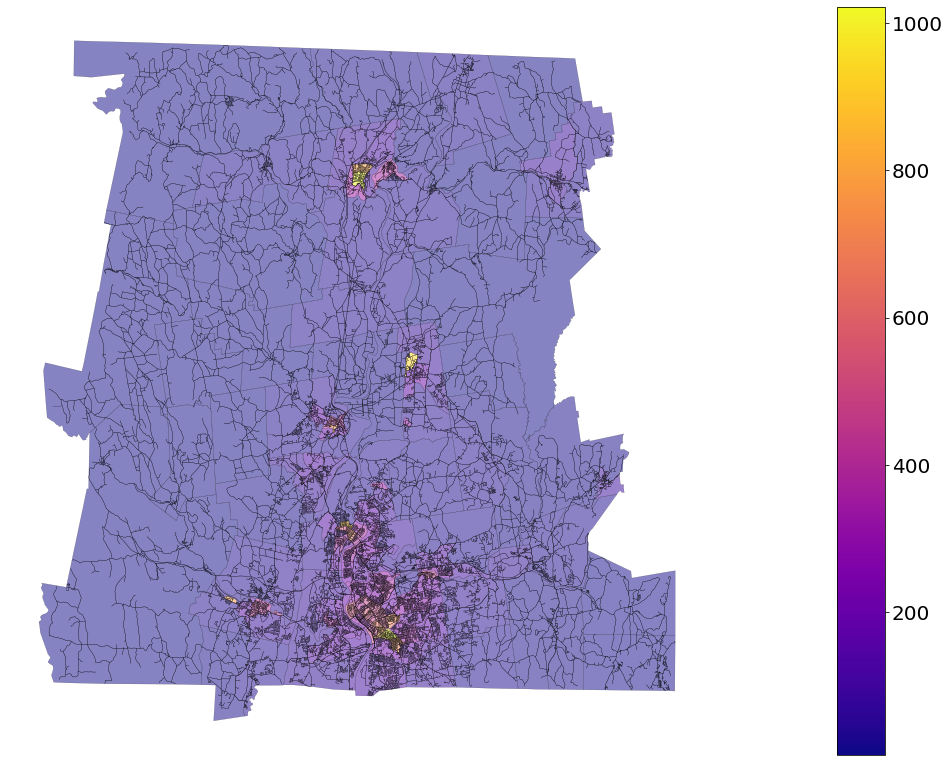

In [304]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
# franklin_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True)
# spfld_msa_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
franklin_demog.plot('population_density_psqkm', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('population_density_psqkm', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-popden.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Income plot

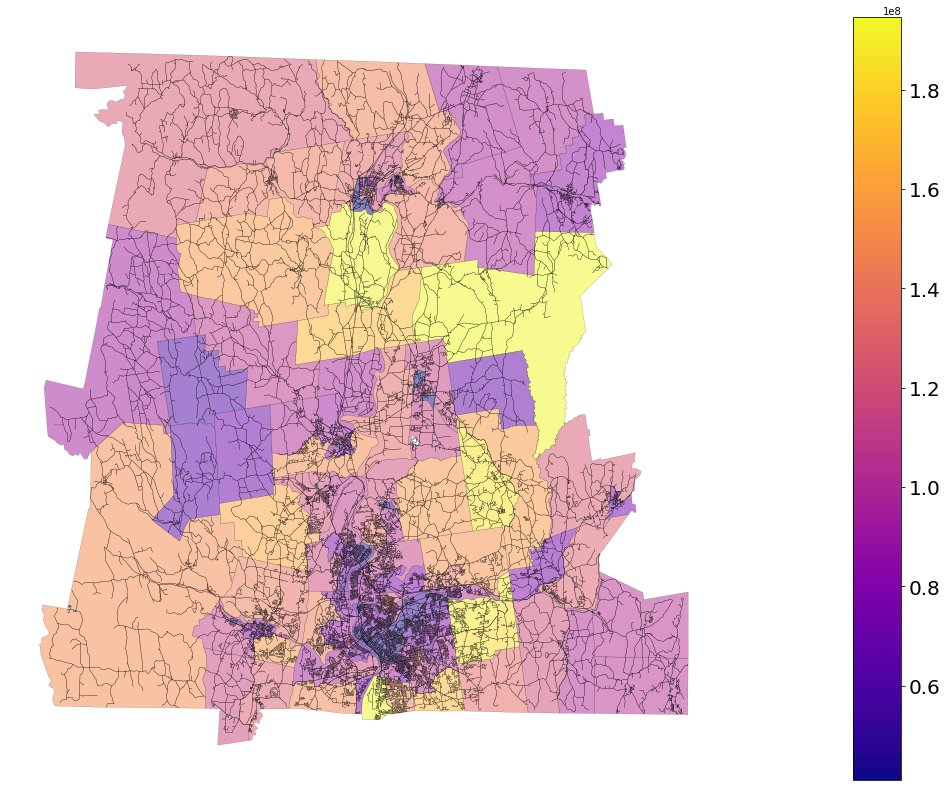

In [310]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B19025A_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B19025A_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-income.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Median age

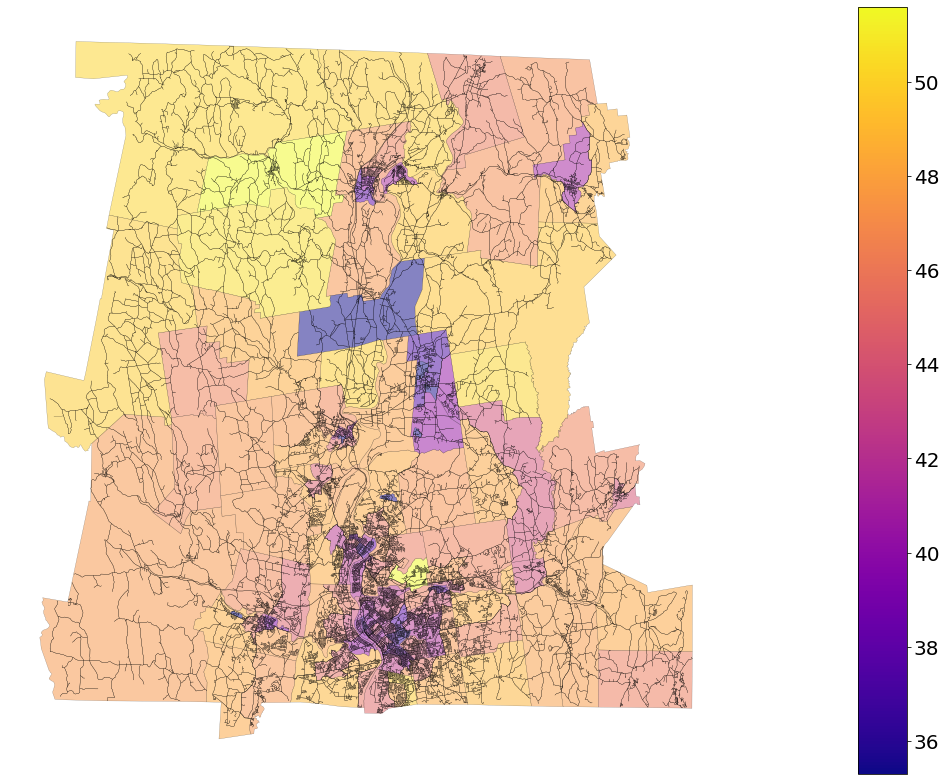

In [308]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B01002_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B01002_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-median-age.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Educational attainment

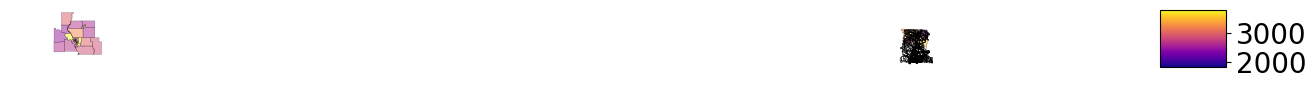

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B15003_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B15003_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-educational_attainment.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')